 # 4. Análisis Exploratorio (EDA)
Gráficas clave:
  - Distribución de puntuaciones (sns.countplot)
  - Top sucursales por volumen de reseñas
  - Top sucursales con mejor/peor promedio
  - Wordcloud de reseñas positivas y negativas
  - Gráfico de correlación (si aplica)
  - Longitud de reseñas vs calificación

instalar librerias


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install wordcloud

Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/df_clean.csv')

In [ ]:
df.head()

,reviewer_id,store_name,store_category,store_address,latitude,longitude,num_ratings,review_time,review,rating,...,review_date,review_month,review_year,review_length,word_count,has_positive_words,has_negative_words,binary_rating,review_limpio,lemmatized_review
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,...,2023-03-31,2023-03,2023.0,259,51,False,False,0,look like someone spit food? normal transactio...,look like spit food normal transaction chill p...
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,...,2023-06-24,2023-06,2023.0,237,42,True,False,1,mcdonalds. far food atmosphere go. staff make ...,mcdonald far food atmosphere staff difference ...
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,...,2023-06-24,2023-06,2023.0,415,70,False,False,0,made mobile order got speaker checked in. line...,mobile order get speaker check line move leave...
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",1 months ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,...,2023-05-30,2023-05,2023.0,176,13,False,False,1,mc. crispy chicken sandwich ïïïïïïïïïïïïïïïïïï...,mc crispy chicken sandwich ïïïïïïïïïïïïïïïïïïï...
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,...,2023-04-30,2023-04,2023.0,312,68,False,False,0,"repeat order 3 times drive thru, still manage ...",repeat order 3 time drive manage mess suppose ...


In [ ]:
df.columns

Index(['reviewer_id', 'store_name', 'store_category', 'store_address',
       'latitude', 'longitude', 'num_ratings', 'review_time', 'review',
       'rating', 'rating_score', 'review_date', 'review_month', 'review_year',
       'review_length', 'word_count', 'has_positive_words',
       'has_negative_words', 'binary_rating', 'review_limpio',
       'lemmatized_review'],
      dtype='object')

### 1. Distribucion de puntuación

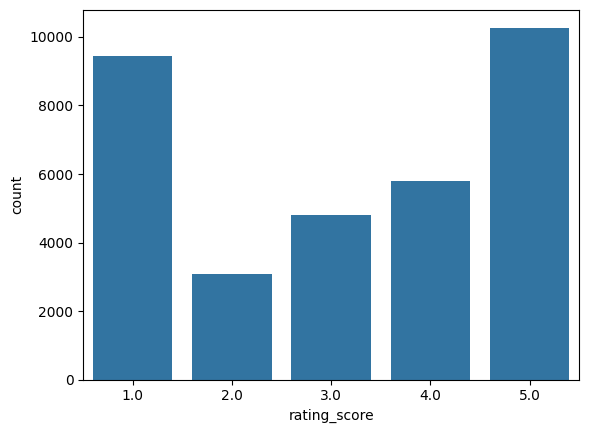

In [ ]:
#haremos un sns.cpunplot para la distribucion de puntuacion

sns.countplot(x='rating_score',data=df)
plt.show()

### 2. Top sucursales por volumen de reseñas

primero vamos a agrupar las suvursales por reseñas

In [ ]:
sucursales=df.groupby('store_address')['reviewer_id'].count().reset_index()
sucursales

,store_address,reviewer_id
0,"1044 US-11, Champlain, NY 12919, United States",620
1,"10451 Santa Monica Blvd, Los Angeles, CA 90025...",3
2,"10901 Riverside Dr, North Hollywood, CA 91602,...",1710
3,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",1168
4,"111 Madison St, Oak Park, IL 60302, United States",751
5,"1121 Garnet Ave, San Diego, CA 92109, United S...",680
6,"11382 US-441, Orlando, FL 32837, United States",710
7,"114 Delancey St, New York, NY 10002, United St...",3
8,"13749 US-183 Hwy, Austin, TX 78750, United States",800
9,"1415 E State Rd, Fern Park, FL 32730, United S...",1700


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#top de las 10
sucursales_top=sucursales.sort_values(by='reviewer_id', ascending=False).head(10)
sucursales_top

,store_address,reviewer_id
38,"9814 International Dr, Orlando, FL 32819, Unit...",1890
27,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...",1720
2,"10901 Riverside Dr, North Hollywood, CA 91602,...",1710
9,"1415 E State Rd, Fern Park, FL 32730, United S...",1700
30,"632 S R L Thornton Freeway Service Rd, Dallas,...",1650
21,"3501 Biscayne Blvd, Miami, FL 33137, United St...",1570
29,"621 Broadway, Newark, NJ 07104, United States",1290
3,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",1168
36,"724 Broadway, New York, NY 10003, United States",1140
35,"72-69 Kissena Blvd, Queens, NY 11367, United S...",1140


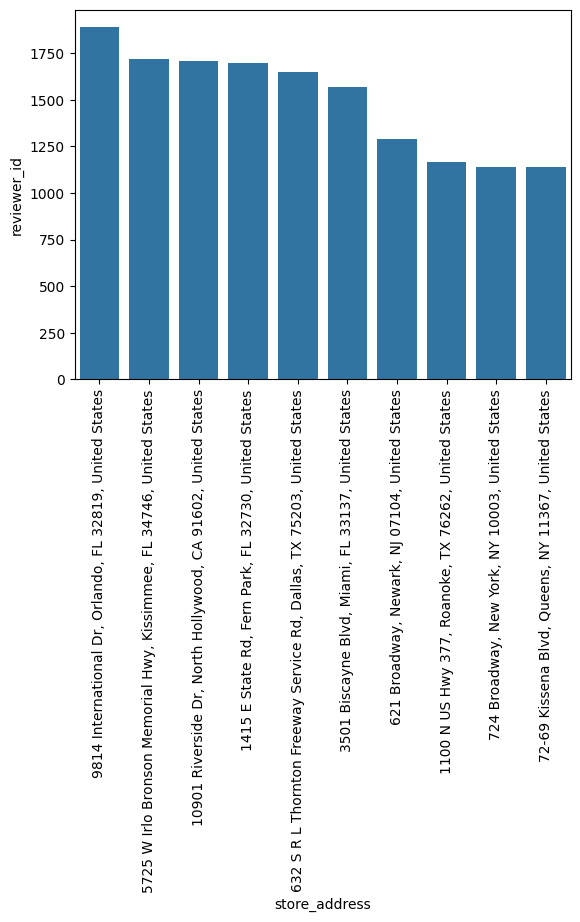

In [ ]:
#vamoas a graficar
sns.barplot(x='store_address', y='reviewer_id',data=sucursales_top)
plt.xticks(rotation=90)
plt.show()

# 3.Top sucursales con mejor/peor promedio

Vamos a colocar primero las sucursales agrupadas y despues haremos el promedio con los promedios

In [ ]:
df.columns

Index(['reviewer_id', 'store_name', 'store_category', 'store_address',
       'latitude', 'longitude', 'num_ratings', 'review_time', 'review',
       'rating', 'rating_score', 'review_date', 'review_month', 'review_year',
       'review_length', 'word_count', 'has_positive_words',
       'has_negative_words', 'binary_rating', 'review_limpio',
       'lemmatized_review'],
      dtype='object')

In [ ]:
df_calificacion=df.groupby('store_address')['rating_score'].mean().reset_index()


In [ ]:
#ordenar los valores de mayor a menos del raiti
df_calficacion_ordenado_top=df_calificacion.sort_values(by='rating_score',ascending=False)
df_calficacion_ordenado_top=df_calificacion.head(10)
df_calficacion_ordenado_top

,store_address,rating_score
0,"1044 US-11, Champlain, NY 12919, United States",3.269355
1,"10451 Santa Monica Blvd, Los Angeles, CA 90025...",3.666667
2,"10901 Riverside Dr, North Hollywood, CA 91602,...",3.377193
3,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",3.465753
4,"111 Madison St, Oak Park, IL 60302, United States",3.362184
5,"1121 Garnet Ave, San Diego, CA 92109, United S...",2.817647
6,"11382 US-441, Orlando, FL 32837, United States",3.164789
7,"114 Delancey St, New York, NY 10002, United St...",3.333333
8,"13749 US-183 Hwy, Austin, TX 78750, United States",3.192500
9,"1415 E State Rd, Fern Park, FL 32730, United S...",3.470588


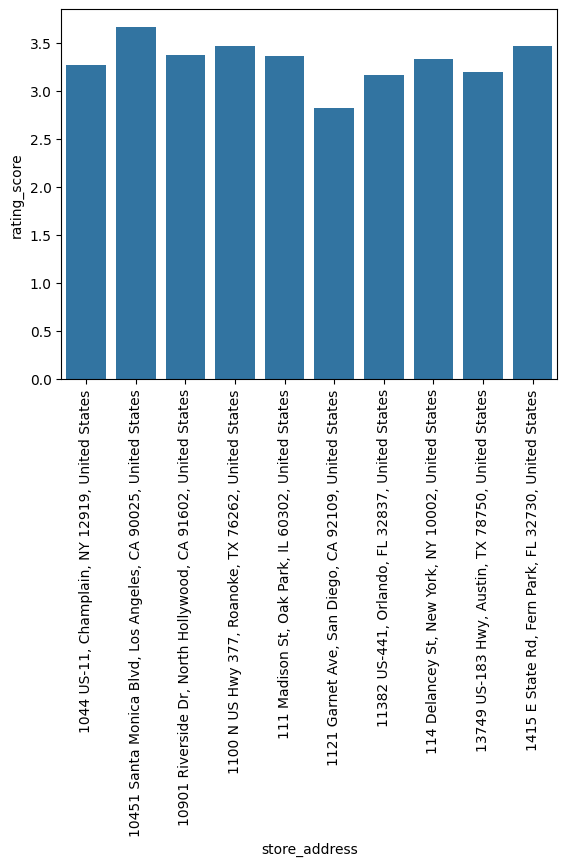

In [ ]:
sns.barplot(x='store_address', y='rating_score',data=df_calficacion_ordenado_top)
plt.xticks(rotation=90)
plt.show()

### 4. Wordcloud de reseñas positivas y negativas

In [ ]:
df.head()

,reviewer_id,store_name,store_category,store_address,latitude,longitude,num_ratings,review_time,review,rating,...,review_date,review_month,review_year,review_length,word_count,has_positive_words,has_negative_words,binary_rating,review_limpio,lemmatized_review
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,...,2023-03-31,2023-03,2023.0,259,51,False,False,0,look like someone spit food? normal transactio...,look like spit food normal transaction chill p...
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,...,2023-06-24,2023-06,2023.0,237,42,True,False,1,mcdonalds. far food atmosphere go. staff make ...,mcdonald far food atmosphere staff difference ...
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,...,2023-06-24,2023-06,2023.0,415,70,False,False,0,made mobile order got speaker checked in. line...,mobile order get speaker check line move leave...
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",1 months ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,...,2023-05-30,2023-05,2023.0,176,13,False,False,1,mc. crispy chicken sandwich ïïïïïïïïïïïïïïïïïï...,mc crispy chicken sandwich ïïïïïïïïïïïïïïïïïïï...
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,...,2023-04-30,2023-04,2023.0,312,68,False,False,0,"repeat order 3 times drive thru, still manage ...",repeat order 3 time drive manage mess suppose ...


In [ ]:
positivas = df[df["has_positive_words"] == True ]["review_limpio"].str.cat(sep=" ")
negativas = df[df["has_negative_words"] == True]["review_limpio"].str.cat(sep=" ")

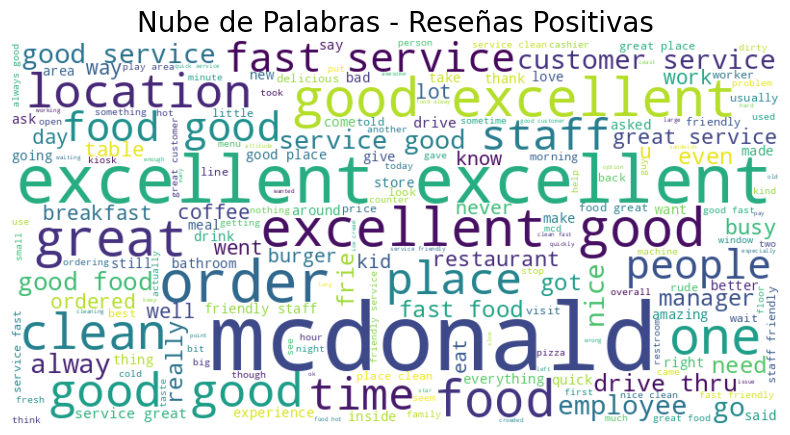

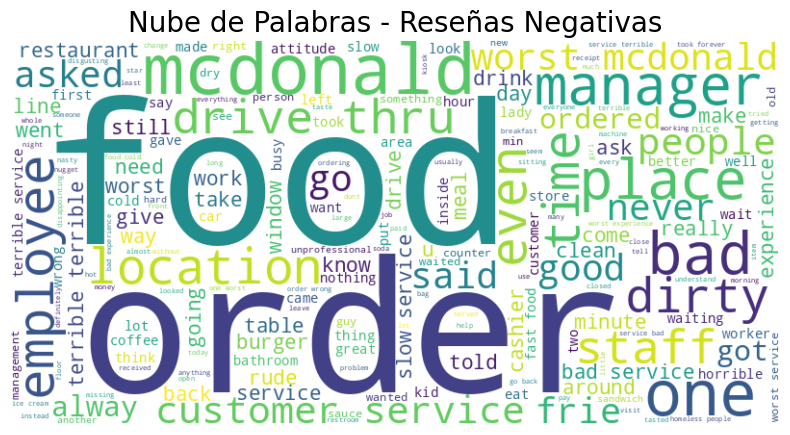

In [ ]:
def mostrar_wordcloud(texto, titulo):
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=20)
    plt.show()

mostrar_wordcloud(positivas, "Nube de Palabras - Reseñas Positivas")
mostrar_wordcloud(negativas, "Nube de Palabras - Reseñas Negativas")


5. Gráfico de correlación (si aplica)

primero Seleccionar columnas numéricas

In [ ]:
numericas=df.select_dtypes(include=['int64', 'float64'])

segundo hacer matriz de correlación

In [ ]:
matriz_correlacion = numericas.corr()

Graficar con Seaborn (Heatmap)

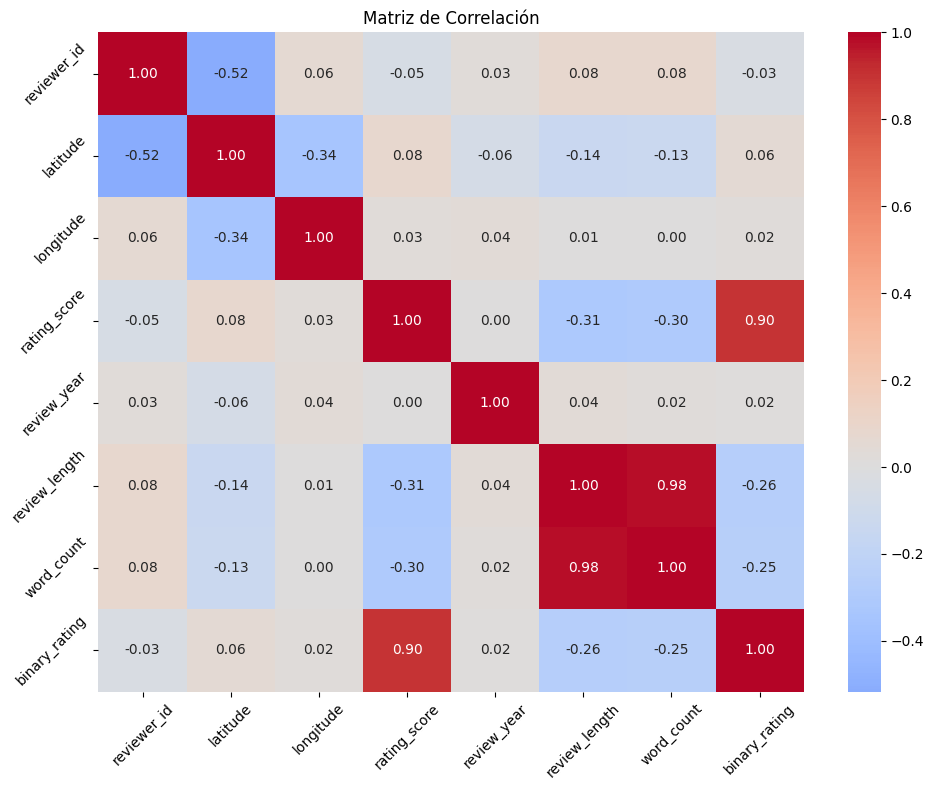

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz de Correlación")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


Longitud de reseña vs calificación

In [ ]:
df['word_count'] = df['review_limpio'].apply(lambda x: len(str(x).split()))


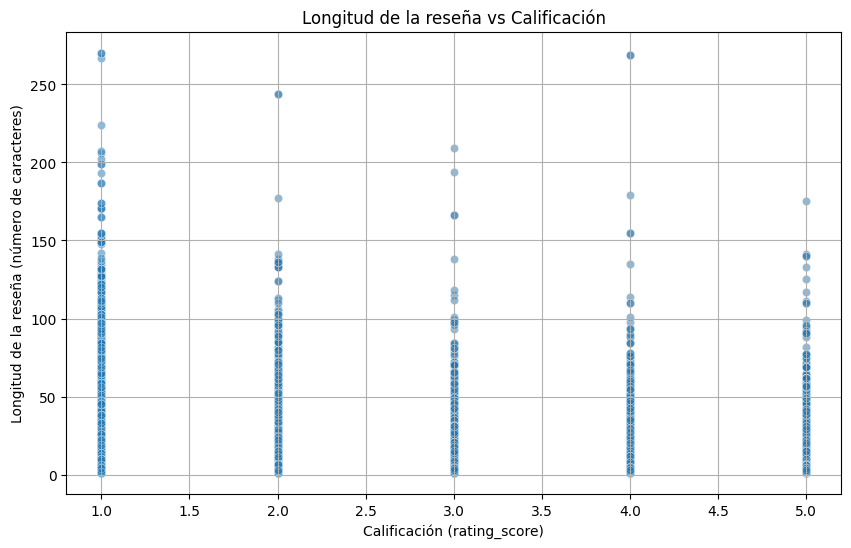

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rating_score', y='word_count', alpha=0.5)
plt.title("Longitud de la reseña vs Calificación")
plt.xlabel("Calificación (rating_score)")
plt.ylabel("Longitud de la reseña (número de caracteres)")
plt.grid(True)
plt.show()


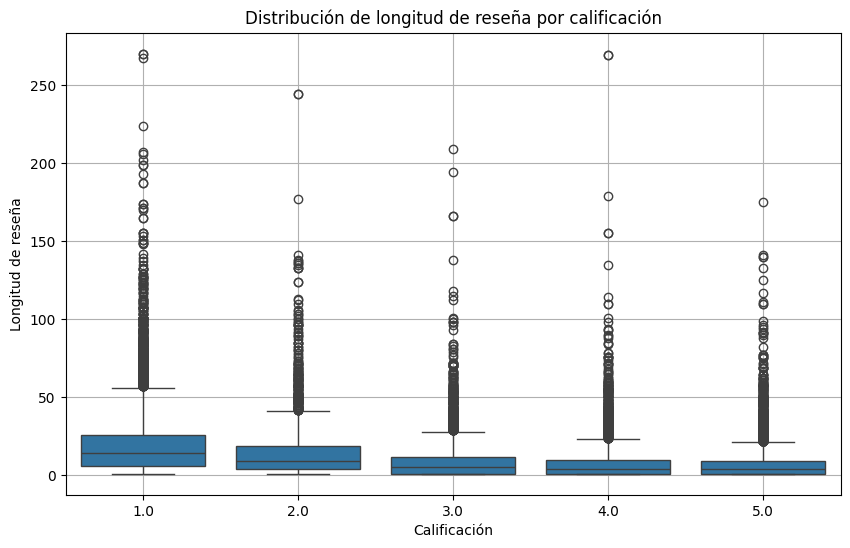

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating_score', y='word_count')
plt.title("Distribución de longitud de reseña por calificación")
plt.xlabel("Calificación")
plt.ylabel("Longitud de reseña")
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Tendencia lineal: longitud vs calificación')

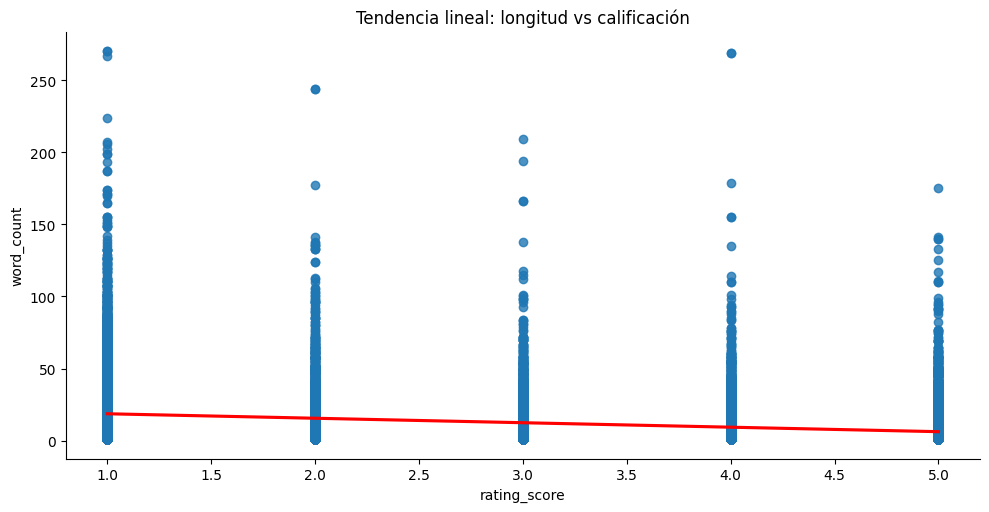

In [ ]:
sns.lmplot(data=df, x='rating_score', y='word_count', aspect=2, line_kws={"color": "red"})
plt.title("Tendencia lineal: longitud vs calificación")


In [ ]:
#Guardar csv
df.to_csv('df_EDA.csv', index=False)
from google.colab import files
files.download('df_EDA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>